In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv('./StudentsPerformance.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Roll No                      1000 non-null   int64 
 1   gender                       1000 non-null   object
 2   race/ethnicity               1000 non-null   object
 3   parental level of education  1000 non-null   object
 4   lunch                        1000 non-null   object
 5   test preparation course      1000 non-null   object
 6   math score                   1000 non-null   int64 
 7   reading score                1000 non-null   int64 
 8   writing score                1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB
None


,Roll No,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,female,group B,bachelor's degree,standard,none,72,72,74
1,2,female,group C,some college,standard,completed,69,90,88
2,3,female,group B,master's degree,standard,none,90,95,93
3,4,male,group A,associate's degree,free/reduced,none,47,57,44
4,5,male,group C,some college,standard,none,76,78,75


In [3]:
# 1. Pie Chart for How many students got more than 70 score, between 60 to 70, between 40 to 60 and below 40 in math. When cursor is above part of chart it should display DIST for above 70, First for below 70 and above 60, and so on.

for i in ['math score','reading score','writing score']:
    # Categorizing math scores
    above_70 = df[df[i] > 70].shape[0]
    between_60_and_70 = df[(df[i] > 60) & (df[i] <= 70)].shape[0]
    between_40_and_60 = df[(df[i] > 40) & (df[i] <= 60)].shape[0]
    below_40 = df[df[i] <= 40].shape[0]

    values = [above_70,between_60_and_70,between_40_and_60,below_40]
    dist = ["Distinction (Above 70)","First class (Between 70 - 60)","Second class (Between 40 - 60)","Fail (Below 40)"]
    # Plotly interactive pie chart
    fig = px.pie(
        values=values, 
        names=dist, 
        title=f'{i} Score Distribution',
        hover_name=dist
    )

    fig.update_traces(hovertemplate='%{label}: %{value} students')
    fig.show()

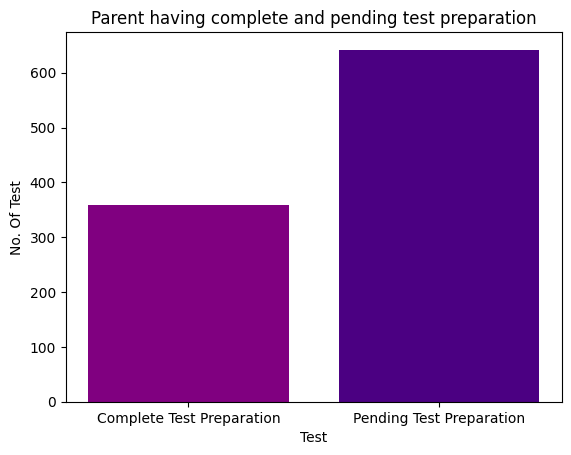

In [4]:
# 4. Bar chart for how many student completed test preparation course and how many student not completed test preparation course.
completeTest = df[df['test preparation course'] == "completed"]['Roll No'].count()
pendingTest = df[df['test preparation course'] == "none"]['Roll No'].count()
plt.bar(['Complete Test Preparation','Pending Test Preparation'],[completeTest,pendingTest],color=['purple','indigo'])
plt.title("Parent having complete and pending test preparation")
plt.xlabel("Test")
plt.ylabel("No. Of Test")
plt.show()

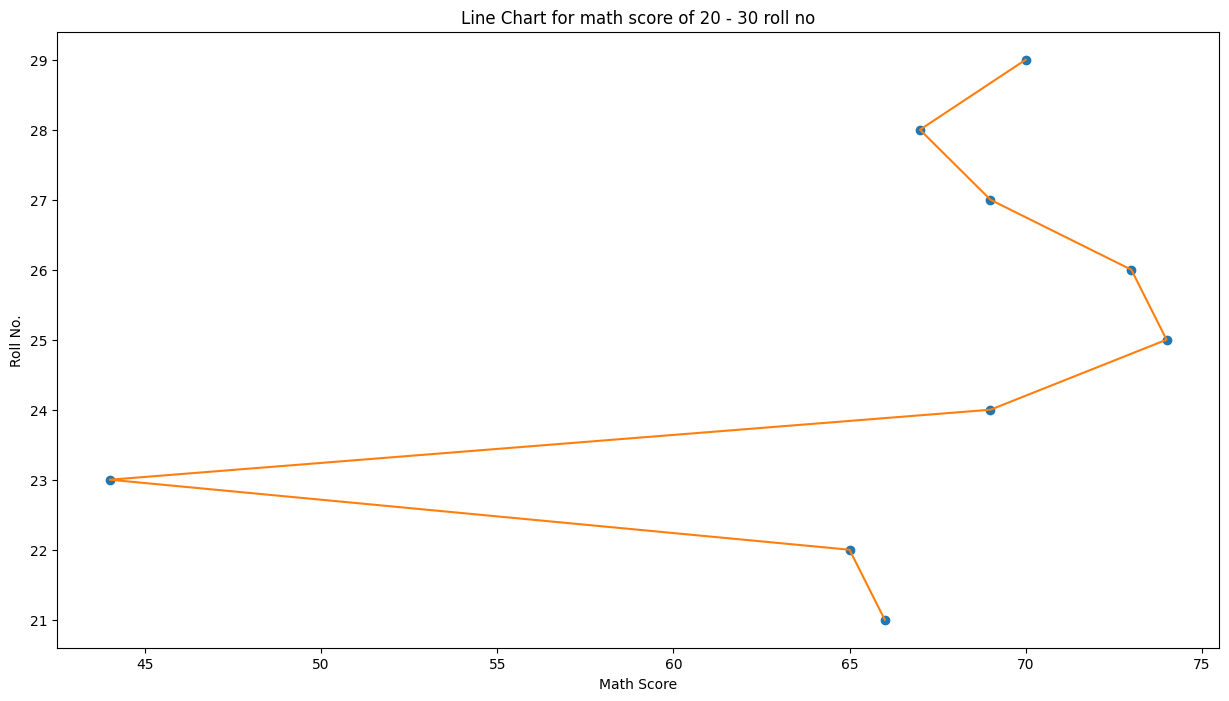

In [5]:
# 5. Line chart for math score of 20 to 30 roll nos.
x = df[(df['Roll No'] > 20) & (df['Roll No'] < 30)]
plt.figure(figsize=(15,8))
plt.plot(x['math score'],x['Roll No'],'o')
plt.plot(x['math score'],x['Roll No'])
plt.title("Line Chart for math score of 20 - 30 roll no")
plt.xlabel("Math Score")
plt.ylabel("Roll No.")
plt.show()

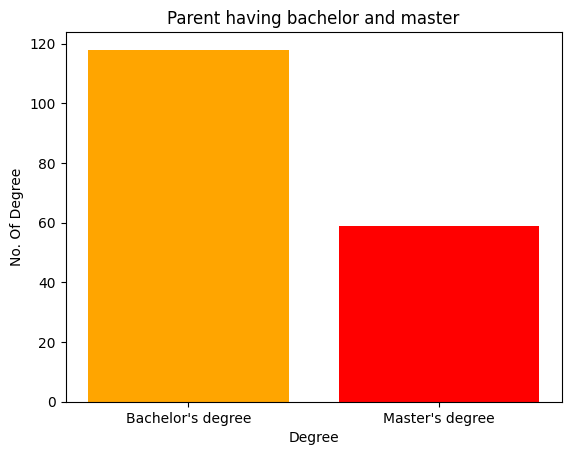

In [6]:
# 6. Display the count with proper design that how many students parent having bachelor and master degree.
bachelor = df[df['parental level of education'] == "bachelor's degree"]['Roll No'].count()
master   = df[df['parental level of education'] == "master's degree"]['Roll No'].count()
plt.bar(['Bachelor\'s degree','Master\'s degree'],[bachelor,master],color=['orange','red'])
plt.title("Parent having bachelor and master")
plt.xlabel("Degree")
plt.ylabel("No. Of Degree")
plt.show()

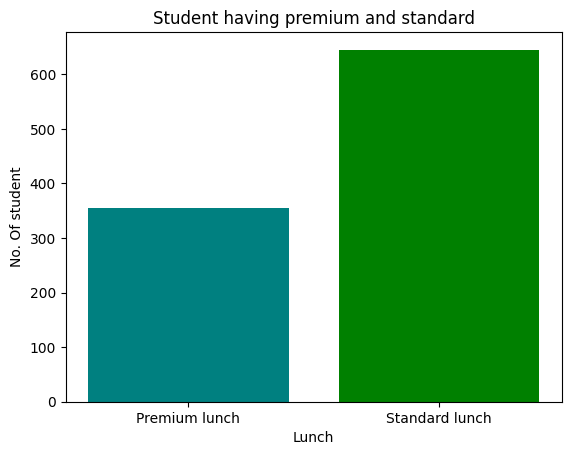

In [7]:
# 7. In dataset, replace data of lunch for free/reduced to premium and display the count of no of students who choose standard lunch and premium lunch.
df['lunch'] = df['lunch'].str.replace('free/reduced','premium')
standard = df[df['lunch'] == "standard"]['Roll No'].count()
premium   = df[df['lunch'] == "premium"]['Roll No'].count()
plt.bar(['Premium lunch','Standard lunch'],[premium,standard],color=['teal','green'])
plt.title("Student having premium and standard")
plt.xlabel("Lunch")
plt.ylabel("No. Of student")
plt.show()